# Load the data in the folder

In [1]:
import numpy as np
import glob



Folder='./'
DataNameBasis='/*Data'

File=glob.glob(Folder+DataNameBasis+"*txt")
data_temp=np.loadtxt(File[0],skiprows=1)
ypos=data_temp[:,4]
nb_angle=len(ypos)
Data_numpyS1=data_temp[:,0]
Data_numpyS1_std=data_temp[:,1]
Data_numpyS2=data_temp[:,2]
Data_numpyS2_std=data_temp[:,3]

Reflectivity=np.divide(Data_numpyS2,Data_numpyS1)

# Plot the Raw data

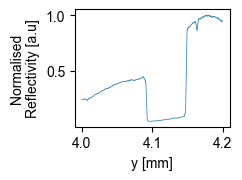

In [2]:
import matplotlib as mat
import matplotlib.pyplot as plt


cm = 1/2.54
fig=plt.figure(figsize=(7*cm,5*cm))
linewidth=0.5

ax0 =plt.subplot(1,1,1)



mat.rcParams.update({'font.size':12,'font.family':'sans-serif','font.sans-serif':['Arial'],
                     'xtick.labelsize':9,'ytick.labelsize':9,'figure.dpi':300,'savefig.dpi':300})



ax0.plot(ypos,Reflectivity/np.max(Reflectivity),linewidth=linewidth)

ax0.fill_between(ypos, ((Data_numpyS2+Data_numpyS2_std)/(Data_numpyS1-Data_numpyS1_std))/np.max(Reflectivity),
                  ((Data_numpyS2-Data_numpyS2_std)/(Data_numpyS1+Data_numpyS1_std))/np.max(Reflectivity), alpha=0.5)

ax0.set_xlabel('y [mm]')
ax0.set_ylabel('Normalised Reflectivity [a.u]', wrap=True)

plt.tight_layout()
plt.savefig('RawData.png')

# Tilt correction

Tilt= 0.8065597439831483 deg/um


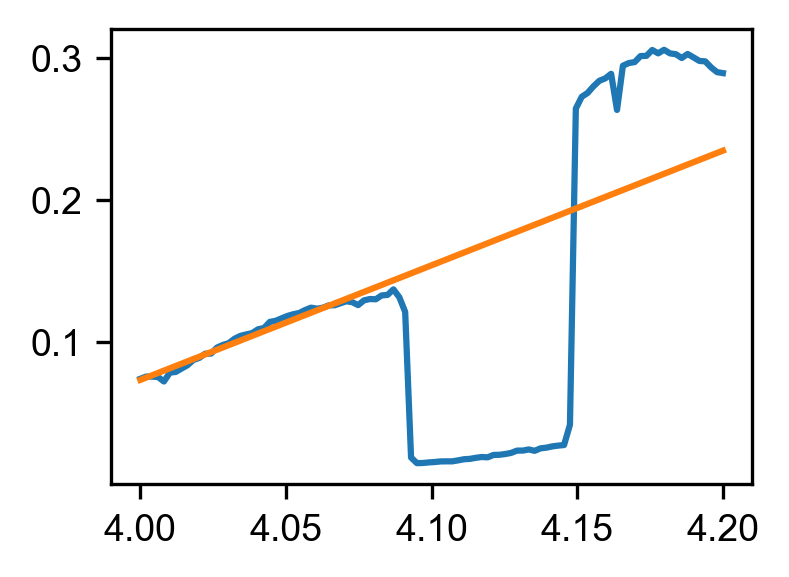

In [3]:
from scipy.optimize import curve_fit

def aff(x,a,b):
    return a*x+b

def fit(x_data, y_data):
    results, errors = curve_fit(aff, x_data, y_data)
    a, b = results
    return a,b

x_fit=np.squeeze(ypos[np.argwhere(ypos<4.08)])
y_fit=np.squeeze(Reflectivity[np.argwhere(ypos<4.08)])
a, b=fit(x_fit, y_fit)

fig=plt.figure(figsize=(7*cm,5*cm))
ax0 =plt.subplot(1,1,1)

ax0.plot(ypos,Reflectivity)
ax0.plot(ypos,aff(ypos,a,b))
print('Tilt= {} deg/um'.format(a))


# Beam spot size measurement

(4.0, 4.1)

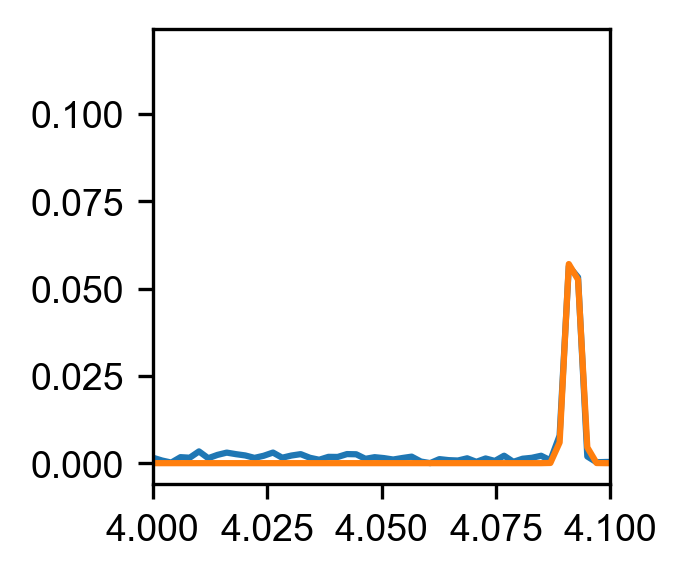

In [16]:
# Define model function to be used to fit to the data above:
def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def fit(x_data, y_data,p):
    results, errors = curve_fit(gauss, x_data, y_data,p0=p)
    a, b,c = results
    return a, b,c 

dR=np.abs(np.gradient(Reflectivity))

x_fit=np.squeeze(ypos[np.argwhere(ypos<4.1)])
y_fit=np.squeeze(dR[np.argwhere(ypos<4.1)])
A , mu, sigma =fit(x_fit, y_fit,[1,4.09,0.005])


fig=plt.figure(figsize=(5*cm,5*cm))
ax0 =plt.subplot(1,1,1)

ax0.plot(ypos,dR)
ax0.plot(ypos,gauss(ypos,A, mu, sigma))
ax0.set_xlim([4, 4.1])